# EDA

## Task 1. Imports, links, and loading

In [6]:
# Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
# Load dataset into a dataframe
df = pd.read_csv('Docs/2017_Yellow_Taxi_Trip_Data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

## Task 2. Data exploration and cleaning

### 2.a. Analyze of travel's time

In [9]:
# Convert to datetime 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# New variable for the time of each travel
df['travel_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['travel_time'] = df['travel_time'].dt.total_seconds() / 3600

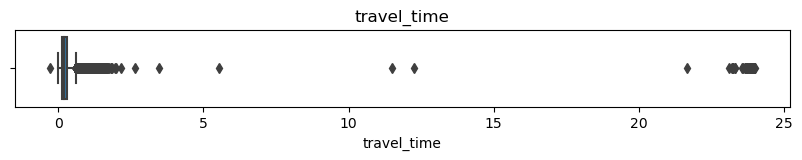

In [10]:
plt.figure(figsize=(10,1))
plt.title('travel_time')
sns.boxplot(x=df['travel_time'])
plt.show()

It is important to note that the 'travel_time' column is in hours. We can therefore observe that some journeys take more than 10 hours, and others more than 20 hours. 
To quantify these outliers, repeat the same columns but with a histogram.

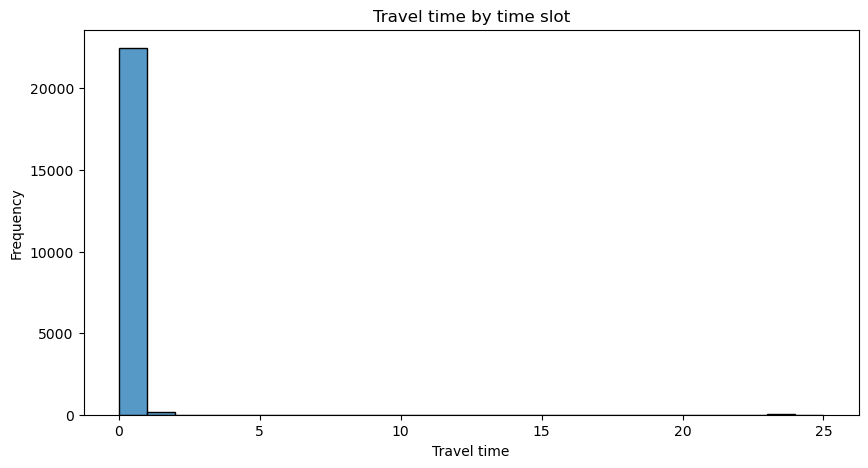

In [13]:
plt.figure(figsize=(10,5))
plt.title('Travel time by time slot')
sns.histplot(df['travel_time'], bins=range(0,26,1))
plt.xlabel('Travel time')
plt.ylabel('Frequency')
plt.show()

### 2.b. Analyze of total amount paid

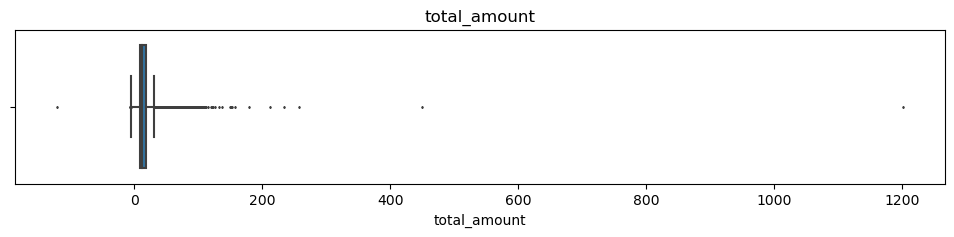

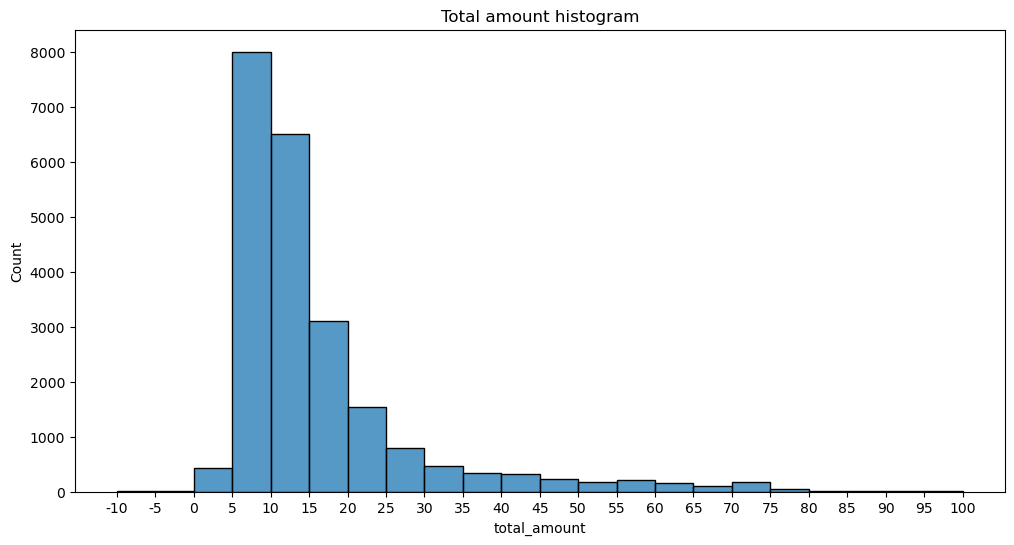

In [24]:
# Boxplot of total_amount

plt.figure(figsize=(12,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

# Histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

### 2.c. Analyze of tip amount

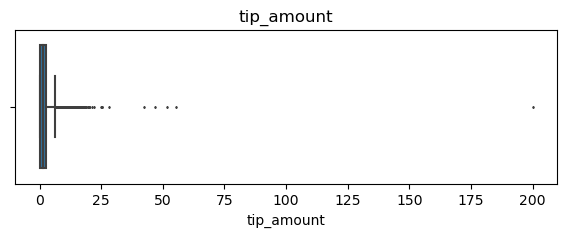

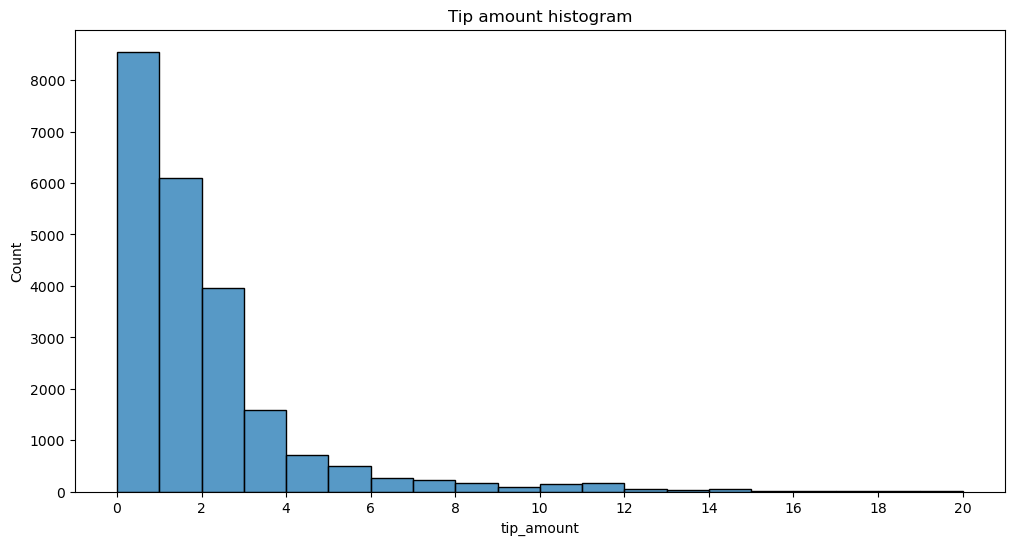

In [25]:
# Boxplot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

# Histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.